# 10.3 RANDOM WALK WITH RANDOM WAITING TIMES

Use this notebook to store your work for this problem.

In [1]:
#*************************************************************
# Mario Segura
# Problem 10.3

#Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

#Random

from numpy.random import default_rng
rng = default_rng()
rand = rng.random


## (a)

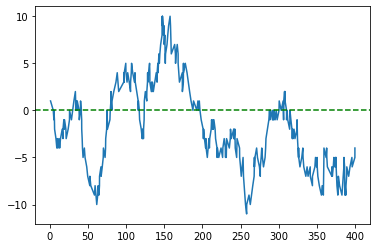

In [16]:
Beta = 1
Rand_N = -((1/Beta) * np.log(rand(800))).cumsum()
t = Rand_N[(Rand_N > 0) * (Rand_N < 400)]
N_Steps = len(t)
X_Rand = 2*(rand(N_Steps) < 0.5) - 1
x = X_Rand.cumsum()

plt.figure()
plt.plot(t,x)

plt.axhline(y=0, color ='g', linestyle = '--')

## (b)

In [17]:
Sims = 50
Beta = 1
End_Ts = [200, 400, 600]

Mean = np.zeros(3)
Var = np.zeros(3)
End_Ps = np.zeros(Sims)

a = 0

for i in End_Ts:
    for n in range(Sims):
        Rand_N = -((1/Beta) * np.log(rand(2*i))).cumsum()
        t = Rand_N[(Rand_N > 0) * (Rand_N < i)]
        N_Steps = len(t)
        X_Rand = 2*(rand(N_Steps) < 0.5) - 1
        x = X_Rand.cumsum()
        End_Ps[n] = x[-1]
    Mean[a] = End_Ps.mean()
    Var[a] = End_Ps.var()
    a = a + 1
        
        

## (c)

## (d)

In [ ]:
#*******2 Dimensions
Beta = 1
Rand_N = -((1/Beta) * np.log(rand(800))).cumsum()
t = Rand_N[(Rand_N > 0) * (Rand_N < 400)]

N_Steps = len(t)
X_Rand = 2*(rand(N_Steps) < 0.5) - 1
x = X_Rand.cumsum()



## (e)